In [1]:
!pip install d2l --no-deps

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 111.7/111.7 kB 5.6 MB/s eta 0:00:00


In [2]:
%matplotlib inline
import torch
from d2l import torch as d2l

## 1.Vanishing and Exploding Gradients.

* Consider a deep neural network with $L$ layers, input **x** and output **o**.
* With each layer $l$ defied by transformation $f_1$ parametrized by weigths $W^{(l)}$, whose hidden layer output is $h^{(l)}$ can be expressed as:
  \begin{aligned}
h(l) &= f_l(h(l-1)) \\
\text{and thus } o &= f_L \circ \cdots \circ f_1(x)
\end{aligned}

* If all the hidden layer output ans the input are vectors, we can write the gradient of $o$ with respect to any set of parameters $W^{(l)}$ as follows:
  \begin{aligned}
\frac{\partial o}{\partial W(l)} &= \frac{\partial h(L)}{\partial h(L-1)} \dots \frac{\partial h(l+1)}{\partial h(l)} \frac{\partial h(l)}{\partial W(l)} \\
M(L) &\triangleq \frac{\partial h(L)}{\partial h(L-1)} \\
M(l+1) &\triangleq \dots \frac{\partial h(l+1)}{\partial h(l)} \\
v(l) &\triangleq \frac{\partial h(l)}{\partial W(l)}
\end{aligned}

* In other words, this gradient is the product of **L-1** matrices $M^{(L)}$....M^{(l+1)} and the gradient vector $v^{(l)}$.

* The risks posed by unstable gradients go beyond numerical representation.
* Gradient of unpredictable magnitude also threaten the stability of our optimization algorithms.
* We may be facing parameters updates that are either:
  1. Excessively large, destroying our model i.e exploding gradient problem.
  2. Excessively small i.e vanishing gradient problem which renders learning impossible as parameters harldly move one each update.


## 1.1 Vanishing Gradients

* One frequent suspect causing the vanishing gradients problem is the choic of the activation $σ$ is appended following each layer's linear operations.
* The sigmoid function was popular because it resembles a thresholding function.
* Since early artificial neural networks were inspired by biological neural networks, the idea of neurons that live or dead seemed appealing.

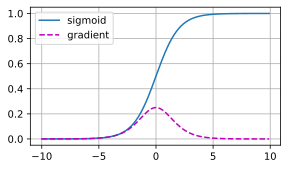

In [3]:
x = torch.arange(-10,10,0.1,requires_grad=True)
y = torch.sigmoid(x)
y.backward(torch.ones_like(x))
d2l.plot(x.detach(),[y.detach().numpy(),x.grad.numpy()],legend=['sigmoid','gradient'],figsize=(4.5,2.5))

* From the above plot we can see that the sigmoid's gradient vanishes both when inputs are large and when they are small.
* When backpropagating through many layers, unless we are in the safe zone i.e where inputs to many sigmoids are close to zero, the gradients of the overall product may vanish.

## 1.3 Exploding gradients

* For illustation purposes, we draw 100 Gaussinarandom matrices and multiply them with some intial matrix.
* For the scale that we picked the variance of 1, the matrix product explodes.
* When this happens becuase of the intialization of the deep neural network, we have no chance of getting a gradient descent optimizer to converge.

In [4]:
M = torch.normal(0,1,size=(4,4))
print('a single matrix \n', M)
for i in range(100):
  M = M @ torch.normal(0,1,size=(4,4))
print('after multiplying 100 matrices\n', M)

a single matrix 
 tensor([[-1.9963,  1.0882,  0.1857, -0.9026],
        [-0.1949,  1.5828, -0.7101,  0.0381],
        [-1.1552, -0.0114, -0.6008,  0.5954],
        [ 0.8840,  1.9591,  0.8740,  1.5541]])
after multiplying 100 matrices
 tensor([[ 1.1538e+24,  1.8328e+25,  1.0094e+25,  7.7119e+24],
        [-7.4178e+23, -1.1783e+25, -6.4895e+24, -4.9578e+24],
        [-1.4733e+24, -2.3403e+25, -1.2890e+25, -9.8473e+24],
        [-2.9713e+24, -4.7196e+25, -2.5994e+25, -1.9859e+25]])
